# SUPPORT VECTOR MACHINE
### Dataset Selection:
#### For this assignment, we'll utilize the widely recognized Mushroom Dataset
#### Task 1: Exploratory Data Analysis (EDA)
#### 1.	Load the Mushroom dataset and perform fundamental data exploration.
#### 2.	Utilize histograms, box plots, or density plots to understand feature distributions.
#### 3.	Investigate feature correlations to discern relationships within the data.


In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('mushroom.csv')
df.head()
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


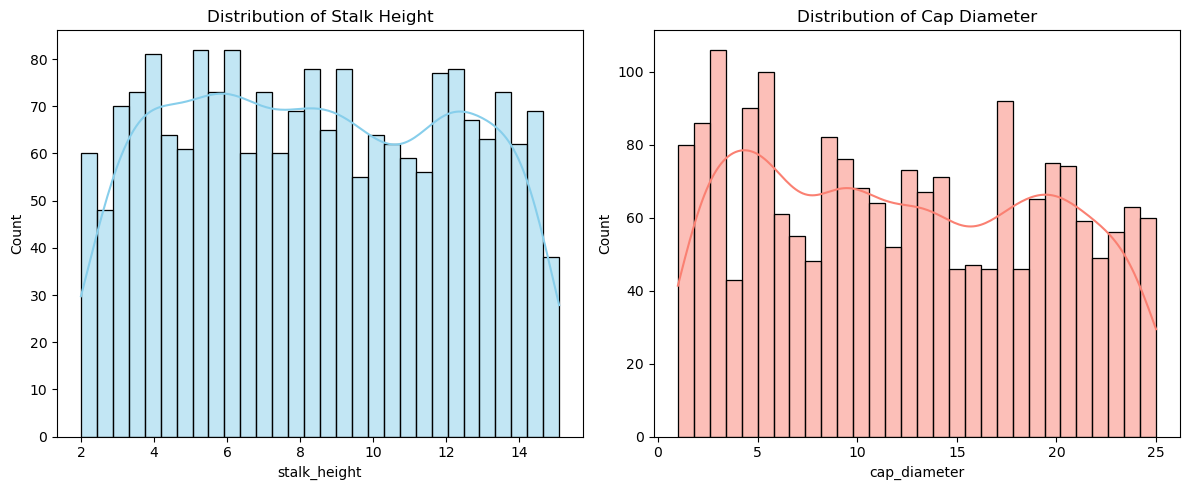

In [4]:
# Plot histograms for numerical features with a single color for each
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Stalk height distribution
sns.histplot(df["stalk_height"], bins=30, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Distribution of Stalk Height")

# Cap diameter distribution
sns.histplot(df["cap_diameter"], bins=30, kde=True, color="salmon", ax=axes[1])
axes[1].set_title("Distribution of Cap Diameter")

plt.tight_layout()
plt.show()

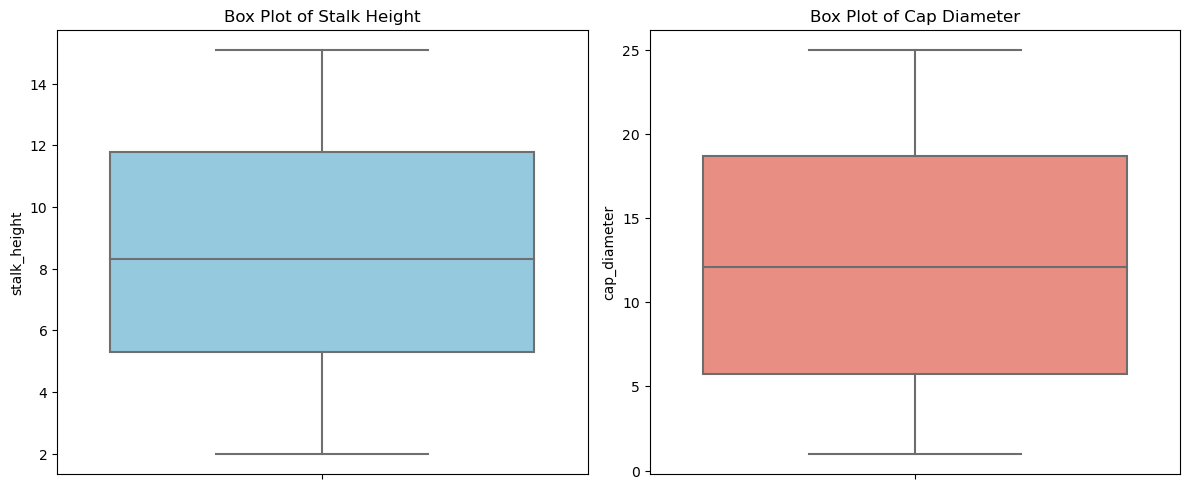

In [5]:
# Create box plots for numerical features to check for outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Box plot for stalk height
sns.boxplot(y=df["stalk_height"], color="skyblue", ax=axes[0])
axes[0].set_title("Box Plot of Stalk Height")

# Box plot for cap diameter
sns.boxplot(y=df["cap_diameter"], color="salmon", ax=axes[1])
axes[1].set_title("Box Plot of Cap Diameter")

plt.tight_layout()
plt.show()

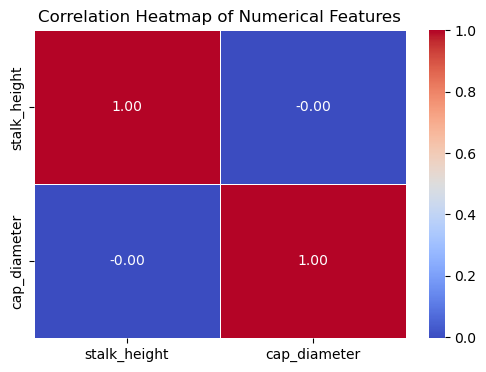

In [6]:
# Compute correlation matrix for numerical features
corr_matrix = df[["stalk_height", "cap_diameter"]].corr()

# Plot the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Task 2: Data Preprocessing
#### 1.	Encode categorical variables if necessary.
#### 2.	Split the dataset into training and testing sets.

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future decoding if needed

# Display the first few rows after encoding
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [9]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=["class"])  # Features
y = df["class"]  # Target

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1600, 25), (400, 25), (1600,), (400,))

### Task 3: Data Visualization
#### 1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
#### 2.	Visualize class distributions to gauge dataset balance or imbalance.


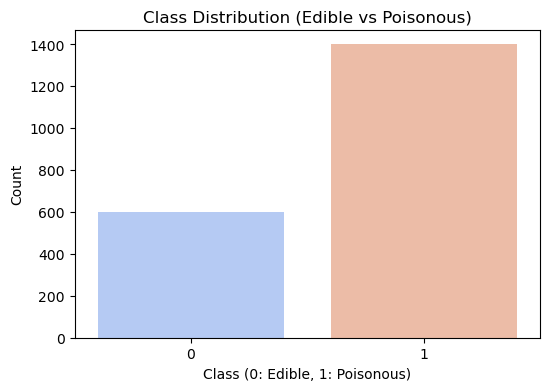

In [11]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="coolwarm")
plt.title("Class Distribution (Edible vs Poisonous)")
plt.xlabel("Class (0: Edible, 1: Poisonous)")
plt.ylabel("Count")
plt.show()


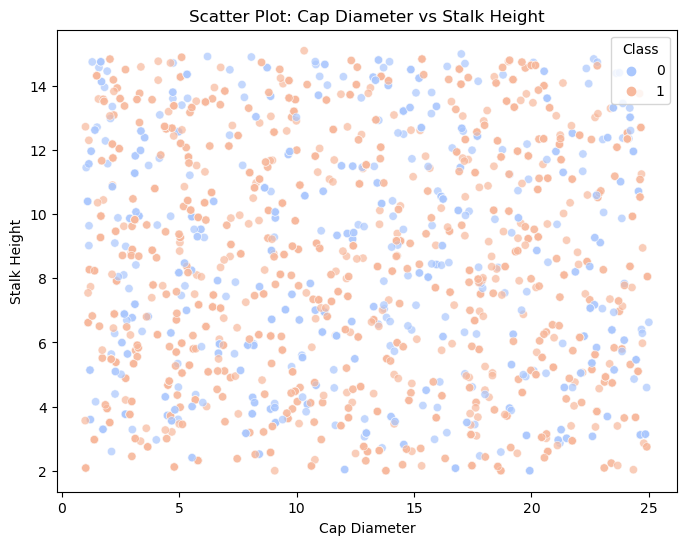

In [12]:
# Scatter plot for stalk_height vs cap_diameter colored by class
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["cap_diameter"], y=df["stalk_height"], hue=df["class"], palette="coolwarm", alpha=0.7)
plt.title("Scatter Plot: Cap Diameter vs Stalk Height")
plt.xlabel("Cap Diameter")
plt.ylabel("Stalk Height")
plt.legend(title="Class")
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


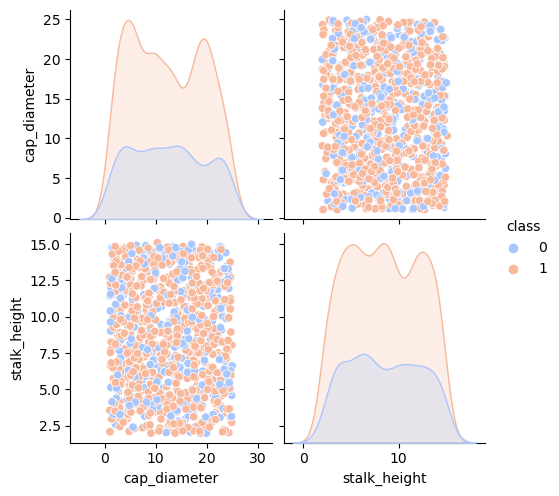

In [13]:
# Pair plot for numerical features with class as hue
sns.pairplot(df, vars=["cap_diameter", "stalk_height"], hue="class", palette="coolwarm", diag_kind="kde")
plt.show()

### Task 4: SVM Implementation
#### 1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
#### 2.	Train the SVM model on the training data.
#### 3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM classifier
svm_model = SVC(kernel="linear", random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

### Task 5: Visualization of SVM Results
#### 1.	Visualize classification results on the testing data.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM Classification")
plt.show()

In [ ]:
import numpy as np

# Select two numerical features for visualization
feature_1 = "cap_diameter"
feature_2 = "stalk_height"

# Train SVM on only two features for visualization
svm_model_2D = SVC(kernel="linear", random_state=42)
svm_model_2D.fit(X_train[[feature_1, feature_2]], y_train)

# Create a mesh grid
x_min, x_max = X_test[feature_1].min() - 1, X_test[feature_1].max() + 1
y_min, y_max = X_test[feature_2].min() - 1, X_test[feature_2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict class for each point in mesh grid
Z = svm_model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_test[feature_1], y=X_test[feature_2], hue=y_test, palette="coolwarm", edgecolor="k")
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title("SVM Decision Boundary")
plt.legend(title="Class")
plt.show()


### Task 6: Parameter Tuning and Optimization
#### 1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    "kernel": ["linear", "rbf", "poly"],
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto"]
}

# Initialize the SVM model
svm_model = SVC()

# Perform grid search
grid_search = GridSearchCV(svm_model, param_grid, scoring="accuracy", cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

### Task 7: Comparison and Analysis
#### 1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
#### 2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
#### 3.	Discuss practical implications of SVM in real-world classification tasks.


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define kernels to test
kernels = ["linear", "poly", "rbf", "sigmoid"]
results = {}

for kernel in kernels:
    # Train an SVM model with the given kernel
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = svm_model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = accuracy

# Display results
for kernel, acc in results.items():
    print(f"SVM Kernel: {kernel} - Accuracy: {acc:.4f}")

### Strengths of SVM
#### Effective in High-Dimensional Spaces – Our dataset has many categorical features (encoded numerically), and SVM can handle them well.
#### Works Well with Small-to-Medium Datasets – With 2000 samples, SVM is efficient.
#### Good for Non-Linear Data – The RBF kernel can capture complex relationships.

### Weaknesses of SVM
#### Computationally Expensive for Large Datasets – If the dataset had millions of rows, SVM would be slow compared to simpler models.
#### Sensitive to Feature Scaling – Requires proper scaling for best performance (e.g., using StandardScaler).
#### Not Easily Interpretable – Unlike decision trees, SVM doesn’t provide direct feature importance insights.



### Medical Diagnosis:
#### Used to classify diseases (e.g., cancer detection from MRI scans).
#### SVM works well when features are high-dimensional and non-linearly separable.

### Spam Detection:
#### SVM classifies emails as spam or not spam based on text features.

### Face & Handwriting Recognition:
#### Applied in biometric security to detect faces, signatures, and handwritten digits.

### Financial Fraud Detection:
#### Banks use SVM to detect fraudulent transactions.